Import Libraries

In [ ]:
#!pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,plot_confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
#!unzip '/content/stayalert.zip'

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
api_token ={"username":"jayajoshi","key":"44ce62157a22130a12eec7db7d495bca"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c stayalert

 49% 9.00M/18.2M [00:00<00:00, 84.6MB/s]
100% 18.2M/18.2M [00:00<00:00, 130MB/s] 


In [ ]:
!unzip '/content/stayalert.zip'

Archive:  /content/stayalert.zip
  inflating: Solution.csv            
  inflating: example_submission.csv  
  inflating: fordTest.csv            
  inflating: fordTrain.csv           


Load and Audit the data

In [ ]:
train=pd.read_csv('/content/fordTrain.csv')
test =pd.read_csv('/content/fordTest.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [ ]:
train.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [ ]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [ ]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

Very high skew V11,P5,P6 
Data is very heterogeneous

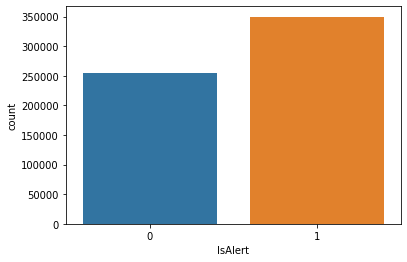

In [ ]:
sns.countplot(data=train,x='IsAlert')

In [ ]:
#train.drop(['TrialID'],['ObsNum'])
# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

train['scaled_P5'] = rob_scaler.fit_transform(train['P5'].values.reshape(-1,1))
train['scaled_P6'] = rob_scaler.fit_transform(train['P6'].values.reshape(-1,1))
train['scaled_V11'] = rob_scaler.fit_transform(train['V11'].values.reshape(-1,1))



In [ ]:
train.drop(['P5','P6','V11'], axis=1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   TrialID     604329 non-null  int64  
 1   ObsNum      604329 non-null  int64  
 2   IsAlert     604329 non-null  int64  
 3   P1          604329 non-null  float64
 4   P2          604329 non-null  float64
 5   P3          604329 non-null  int64  
 6   P4          604329 non-null  float64
 7   P7          604329 non-null  float64
 8   P8          604329 non-null  int64  
 9   E1          604329 non-null  float64
 10  E2          604329 non-null  float64
 11  E3          604329 non-null  int64  
 12  E4          604329 non-null  int64  
 13  E5          604329 non-null  float64
 14  E6          604329 non-null  int64  
 15  E7          604329 non-null  int64  
 16  E8          604329 non-null  int64  
 17  E9          604329 non-null  int64  
 18  E10         604329 non-null  int64  
 19  E1

##Application of Random Forest Classification


Divide data into train and test

In [ ]:
x=train.iloc[:,3:]
y=train['IsAlert']

In [ ]:
print(x.shape)

(604329, 30)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(483463, 30)
(120866, 30)
(483463,)
(120866,)


In [ ]:
rf=RandomForestClassifier(verbose=1,random_state=123)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.6s finished


In [ ]:
def model_eval(actual,predicted):
  acc_score=accuracy_score(actual,predicted)
  cm_matrix=confusion_matrix(actual,predicted)
  cr_rep=classification_report(actual,predicted)
  print("Accuracy of model is :",round(acc_score,2))
  print(cm_matrix)
  print(cr_rep)
 

Accuracy of model is : 1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.6s finished


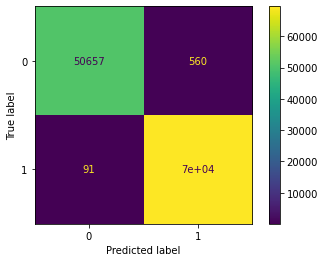

In [ ]:
model_eval(y_train,pred_train)
plot_confusion_matrix(rf,x_test,y_test)

In [ ]:
model_eval(y_test,pred_test)

Accuracy of model is : 0.99
[[50657   560]
 [   91 69558]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51217
           1       0.99      1.00      1.00     69649

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



From confusion matrix , False positive rate is 542

**Implementation of RandomizedSearchCV**

In [ ]:
param_dist={"max_depth":range(2,5),
            "min_samples_split":range(2,11),
            "n_estimators": [100,400,700,800,1000],
            "criterion":["gini","entropy"]}

In [ ]:
#rsrch= RandomizedSearchCV(estimator=rf,param_distributions=param_dist,n_iter=10,random_state=123)

In [ ]:
#rsrch.fit(x_train,y_train)

In [ ]:
#rsrch.best_estimator_

Applying Logistic Regression

In [ ]:
lr= LogisticRegression(verbose=1,max_iter=200)
lr.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.8s finished


LogisticRegression(max_iter=200, verbose=1)

In [ ]:
y_lr_pred=lr.predict(x_test)

In [ ]:
model_eval(y_test,y_lr_pred)

Accuracy of model is : 0.7
[[28401 22816]
 [13112 56537]]
              precision    recall  f1-score   support

           0       0.68      0.55      0.61     51217
           1       0.71      0.81      0.76     69649

    accuracy                           0.70    120866
   macro avg       0.70      0.68      0.69    120866
weighted avg       0.70      0.70      0.70    120866



Accuracy of LR is 0.67

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dtrain=rf.predict(x_train)
pred_dtest=rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.6s finished


In [ ]:
model_eval(y_test,pred_dtest)

Accuracy of model is : 0.99
[[50657   560]
 [   91 69558]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51217
           1       0.99      1.00      1.00     69649

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



# Principal Component Analysis

In [ ]:
pca=PCA(n_components=len(x.columns))
pca.fit(x_train)

PCA(n_components=30)

In [ ]:
pca.explained_variance_ratio_

array([6.52138603e-01, 1.61630456e-01, 1.47816130e-01, 2.72351983e-02,
       5.53188291e-03, 2.14059365e-03, 1.25453638e-03, 6.18686244e-04,
       4.84435729e-04, 3.71500641e-04, 1.93373212e-04, 1.21892658e-04,
       1.12124033e-04, 1.04243946e-04, 9.33477176e-05, 7.07742722e-05,
       3.90157888e-05, 2.37657765e-05, 1.23126689e-05, 2.65811993e-06,
       2.18689316e-06, 1.34066179e-06, 3.97924583e-07, 3.29989346e-07,
       1.40168971e-07, 7.41232258e-08, 8.32626226e-12, 6.01653869e-33,
       6.01653869e-33, 6.01653869e-33])

Cumulative sum to get sum at each level.
1 - 95
2 - 2
cumsum =97

In [ ]:
var =np.cumsum(np.round(pca.explained_variance_ratio_,2))

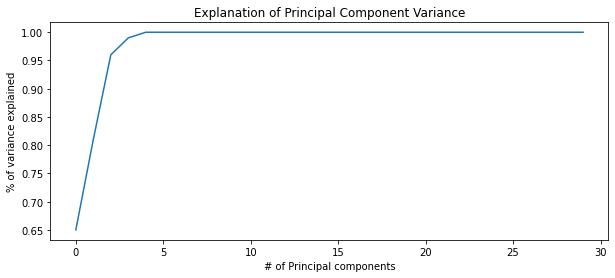

In [ ]:
plt.figure(figsize=(10, 4))
plt.ylabel('% of variance explained')
plt.xlabel('# of Principal components')
#plt.ylim(min(var),1)
plt.title('Explanation of Principal Component Variance')
plt.plot(var)
plt.show()

In [ ]:
pca=PCA(n_components=15)
x_train_trans = pca.fit_transform(x_train)
x_test_trans=pca.fit_transform(x_test)

Random Forest with Transformed features

In [ ]:
rf=RandomForestClassifier(random_state=123)
rf.fit(x_train_trans,y_train)
pred_rf_pca_train=rf.predict(x_train_trans)
pred_rf_pca_test=rf.predict(x_test_trans)

In [ ]:
model_eval(y_train,pred_rf_pca_train)
print("Test")
model_eval(y_test,pred_rf_pca_test)

Accuracy of model is : 1.0
[[203326      1]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463

Test
Accuracy of model is : 0.95
[[46632  4585]
 [ 1119 68530]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     51217
           1       0.94      0.98      0.96     69649

    accuracy                           0.95    120866
   macro avg       0.96      0.95      0.95    120866
weighted avg       0.95      0.95      0.95    120866

